In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
folder = '/content/drive/MyDrive/UCR/QECSpinQubits/Plots/MC_results/'
#folder = '/content/drive/MyDrive/QECSpinQubits/Plots/MC_results/'# For Juan

In [4]:
def update_benddown_curve(lower_curve ):
  y_max = np.where(lower_curve == np.max(lower_curve))
  y_max_num = y_max[0][0]
  # print()
  y_max_val = lower_curve[y_max_num]
  lower_curve_update = y_max_val * np.ones_like(lower_curve)
  for y_idx in range(y_max_num):
    lower_curve_update[y_idx] = lower_curve[y_idx]

  return lower_curve_update


def update_up_bound_curve(upper_curve):
  y_thres = np.where(upper_curve > 0.5)
  y_max_num = y_thres[0][0]
  # print()
  y_max_val = upper_curve[y_max_num]
  if y_max_val > 0.5:
    y_max_val = 0.5
  upper_curve_update = y_max_val * np.ones_like(upper_curve)
  for y_idx in range(y_max_num):
    upper_curve_update[y_idx] = upper_curve[y_idx]

  return upper_curve_update

# plt.plot(x, y1)
# y1_update = update_benddown_curve(y1)
# plt.plot(x, y1_update)

# plt.plot(x, y3, label = 'original')
# y3_update = update_benddown_curve(y3)
# plt.plot(x, y3_update, label = 'fixed')
# # plt.xscale('log')
# # plt.yscale('log')

# plt.legend()

def find_2cvs_intersect(x1, c1, c2):
  idx = np.argwhere(np.diff(np.sign(c1 - c2))).flatten()
  int_x, int_c = x1[idx], c1[idx]
  return int_x, int_c
  # plt.plot(x[idx], y3[idx], 'ro')
  # plt.show()
# x_intersec , y_intersect = intersection(x, y3,x,y6)

# Fig 1

In [ ]:
#data_filename = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30variousT2physqubit_0tprep_constantpmST.dat'
data_filename = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10variousT2physqubit_0tprep_constantpmST.dat'  # for the new experimental parameters the measurement time ratio is 10.
dfsurfX30 = pd.read_csv(data_filename, sep = ' ')

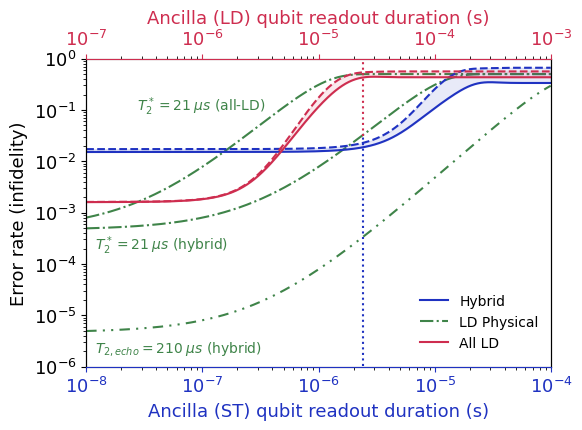

In [ ]:
ftsz = 13
lbsz = 10
x = dfsurfX30['t']
y1 = dfsurfX30['p_lowerLD']
# y1 = update_benddown_curve(y1)
y2 = dfsurfX30['p_upperLD']
# y2 = update_up_bound_curve(y2)

y3 = dfsurfX30['p_lowerST']
# y3 = update_benddown_curve(y3)
y4 = dfsurfX30['p_upperST']
# y4 = update_up_bound_curve(y4)

y5 = dfsurfX30['p_LDqubit_STduration_upper']
y6 = dfsurfX30['p_LDqubit_STduration_lower']
y7 = dfsurfX30['p_210_STduration_upper']
y8 = dfsurfX30['p_210_STduration_lower']

y9 = dfsurfX30['p_measST']

y10 = dfsurfX30['p_LDqubit_LDduration_upper']
y11 = dfsurfX30['p_LDqubit_LDduration_lower']

x_ld_sota = 2.4e-5
#x_st_sota = 8e-7
x_st_sota = 2.4e-6  # new value from Juan
meas_time_ratio = x_ld_sota / x_st_sota

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Ancilla (ST) qubit readout duration (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)
# plt.grid(alpha = 0.25)
plt.yscale('log')
plt.xscale('log')
mid_pt_val  =  0.75

color3 = '#3F8449'
color2 = '#CE2D4F'
color1 = '#1F32C1'

plt.axvline(x = x_ld_sota / meas_time_ratio, color = color2, ymin= mid_pt_val, ymax=1.2, linestyle = ':') #, label = 'axvline - full height'
plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= mid_pt_val , linestyle = ':' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(x, y3, color= color1, linestyle = '-', label="Hybrid") #color="blue"
ax.plot(x, y4, color= color1, linestyle = '--', label="") # color="blue",
ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)
#ax.plot(x, y6, color="gray", label="LD physical qubit idle for QEC LD-ST duration")
ax.xaxis.label.set_color(color1)
ax.tick_params(axis='x', colors= color1, labelsize=ftsz)
ax.tick_params(axis='y', colors='black', labelsize=ftsz)

ax2 = ax.twiny() # (LD is 'meas_time_ratio' times longer)
ax2.plot(x*meas_time_ratio, y1, color= color2, linestyle = '-', label="All LD")
ax2.plot(x*meas_time_ratio, y2, color= color2, linestyle = '--',  label="")
ax2.fill_between(x*meas_time_ratio, y1, y2, color = color2, alpha = 0.1)
#ax2.plot(x*30, y5, color="black", label="LD physical qubit")
ax2.set_xlabel('Ancilla (LD) qubit readout duration (s)', fontsize=ftsz)
ax2.set_xscale('log')
ax2.xaxis.label.set_color(color2)
ax2.tick_params(colors=color2, which='major', labelsize=ftsz)
ax2.tick_params(colors='black', which='minor', labelsize=ftsz)
ax2.spines['top'].set_color(color2)
ax2.spines['bottom'].set_color(color1)
# ax.spines['bottom'].set_lw(3)

plt_fac = 0.4
ax.plot(x*1, y5, '-.', color=color3,zorder=-1, label='LD Physical') #, label="T2 = 21 us"
ax.text(1.2e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$ (hybrid)', color = color3,fontsize=lbsz)
#ax.plot(x*1, y6, '--', color="black")

ax2.plot(x*meas_time_ratio, y7,  ls=(0, (5, 3, 1, 3, 1, 3)), color=color3,zorder=-1) #, label="T2 = 210 us"
ax.text(1.2e-8, y7[0]*plt_fac, r'$T_{2, echo}=210 \; \mu s$ (hybrid)',color=color3, fontsize=lbsz)
#ax.plot(x, y8, '--', color="gray", label='')

#ax.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax.text(0.8e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
#ax.tick_params(axis='both',  labelsize=lbsz)

#ax.plot(x, y9, '--', color="green", label='p_measST')

ax.plot(x*1, y10, '-.', color=color3, label='',zorder=-1)
ax.text(2.75e-8, 0.1, r'$T_2^*=21 \; \mu s$ (all-LD)', color=color3,fontsize=lbsz)


# plt.ylim(0.351, 0.5)
ax.set_xlim(1.e-8, 1.e-4)
ax2.set_xlim(meas_time_ratio*1.e-8, meas_time_ratio*1.e-4)
ax.set_ylim(0.000001, 1.)

# plt.legend(['LD-ST', '', '', 'LD-ST','','', '', ], loc="lower right", title="", frameon=False)

# Add a legend, and position it on the lower left (with no box)

fig.legend(loc="lower right", bbox_to_anchor=(0.9, 0.12), title="", frameon=False, fontsize=lbsz)
# plt.grid(alpha = 0.25)

#plt.show()
plt.savefig(folder+"/comp_readout_times.pdf", format="pdf", bbox_inches="tight")


# Fig 2

In [5]:
#data_filename_surf = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30variousT2physqubit_0tprep_variablepmST.dat'
data_filename_surf = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10variousT2physqubit_0tprep_variablepmST.dat'  # for the new experimental parameters the measurement time ratio is 10.
dfsurfST = pd.read_csv(data_filename_surf, sep = ' ')
#data_filename_BS = folder + 'QECd3_BS17/qdot1/2/X/resultsQECd3_Imeas30variousT2physqubit_0tprep_variablepmST.dat'
data_filename_BS = folder + 'QECd3_BS17/qdot1/2/X/resultsQECd3_Imeas10variousT2physqubit_0tprep_variablepmST.dat'   # for the new experimental parameters the measurement time ratio is 10.
dfBSST = pd.read_csv(data_filename_BS, sep = ' ')

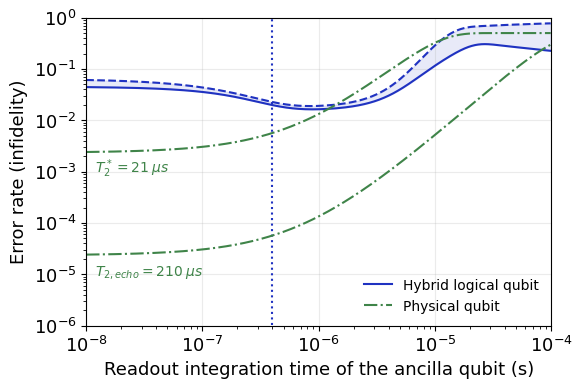

In [ ]:
ftsz = 13
lbsz = 10

x = dfsurfST['t']

y3 = dfsurfST['p_lowerST']
y4 = dfsurfST['p_upperST']
# y3 = update_benddown_curve(y3)
# y4 = update_up_bound_curve(y4)

y5 = dfsurfST['p_LDqubit_STduration_upper']
y6 = dfsurfST['p_210_STduration_upper']
y7 = dfsurfST['p_2100_STduration_upper']



color3 = '#3F8449'
color2 = '#CE2D4F'
color1 = '#1F32C1'

int_t_ST = 0.4*1.e-6

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)

plt.axvline(x=int_t_ST , color = color1, ymin=0.001, ymax= 1.2 , linestyle = ':' )
# plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = ':' )

#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

#ax.plot(x*1, y1, color=color2, label="All-Zeeman") #
#ax.plot(x*1, y2, color=color2,  linestyle = '--' , label="")
#ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)

ax.plot(x, y3, color=color1, label="Hybrid logical qubit")
ax.fill_between(x*1, y3, y4, color = color1 ,  alpha = 0.1)
ax.plot(x, y4, color=color1, linestyle = '--', label="")

plt_fac = 0.4
ax.plot(x*1, y5, '-.', color=color3, label="Physical qubit") #, label="T2 = 21 us"
ax.text(1.2e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', color=color3,fontsize=lbsz)

ax.plot(x, y6, '-.', color=color3) #, label="T2 = 210 us"
ax.text(1.2e-8, y6[0]*plt_fac, r'$T_{2, echo}=210 \; \mu s$', color=color3,fontsize=lbsz)
# ax.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax.tick_params(axis='both',  labelsize=ftsz)

#ax2.tick_params(colors=color2, which='major', labelsize=lbsz)
#ax2.tick_params(colors='black', which='minor', labelsize=lbsz)
#ax2.spines['top'].set_color(color2)
#ax2.spines['bottom'].set_color(color1)
# ax.spines['bottom'].set_lw(3)

# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-8, 1e-4)
plt.ylim(1e-6, 1)
plt.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

plt.grid(alpha = 0.25)
plt.show()

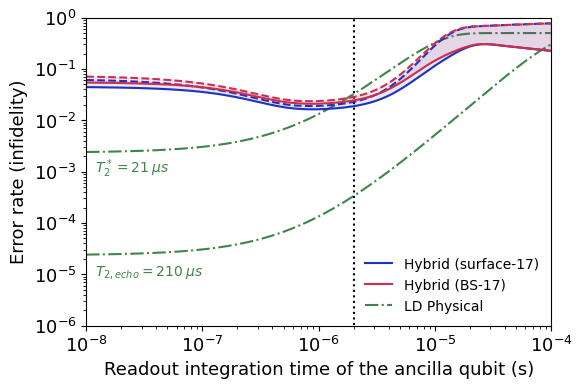

In [ ]:
ftsz = 13
lbsz = 10

x = dfsurfST['t']

y3 = dfsurfST['p_lowerST']
# y3 = update_benddown_curve(y3)
# y4 = update_up_bound_curve(y4)

y5 = dfsurfST['p_LDqubit_STduration_upper']
y6 = dfsurfST['p_210_STduration_upper']
y7 = dfsurfST['p_2100_STduration_upper']

y8 = dfBSST['p_lowerST']
y9 = dfBSST['p_upperST']
# y8 = update_benddown_curve(y8)
# y9 = update_up_bound_curve(y9)

color3 = '#3F8449'
color2 = '#CE2D4F'
color1 = '#1F32C1'

#int_t_ST = 0.4*1.e-6
int_t_ST = 2.0*1.e-6  # the total measurement time is 2.4 us, of which 0.4 us is the ramping time.

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)

plt.axvline(x = int_t_ST , color = 'k', ymin=0.001, ymax= 1.2 , linestyle = ':' )
# plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = '-.' )

#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

#ax.plot(x*1, y1, color=color2, label="All-Zeeman") #
#ax.plot(x*1, y2, color=color2,  linestyle = '--' , label="")
#ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)

ax.plot(x, y3, color=color1, label="Hybrid (surface-17)")
ax.fill_between(x*1, y3, y4, color = color1 ,  alpha = 0.1)
ax.plot(x, y4, color=color1, linestyle = '--', label="")

ax.plot(x, y8, color=color2, label="Hybrid (BS-17)")
ax.fill_between(x*1, y8, y9, color = color2 ,  alpha = 0.1)
ax.plot(x, y9, color=color2, linestyle = '--', label="")

plt_fac = 0.4
ax.plot(x*1, y5, '-.', color=color3, label="LD Physical",zorder=-1) #, label="T2 = 21 us"
ax.text(1.2e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', color=color3, fontsize=lbsz)

ax.plot(x, y6, '-.', color=color3,zorder=-1) #, label="T2 = 210 us"
ax.text(1.2e-8, y6[0]*plt_fac, r'$T_{2, echo}=210 \; \mu s$',color=color3, fontsize=lbsz)
# ax.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax.tick_params(axis='both',  labelsize=ftsz)

#ax2.tick_params(colors=color2, which='major', labelsize=lbsz)
#ax2.tick_params(colors='black', which='minor', labelsize=lbsz)
#ax2.spines['top'].set_color(color2)
#ax2.spines['bottom'].set_color(color1)
# ax.spines['bottom'].set_lw(3)


# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-8, 1e-4)
plt.ylim(1e-6, 1)
plt.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

# plt.grid(alpha = 0.25)
# plt.show()
plt.savefig(folder+"/S17-BS17_comp.pdf", format="pdf", bbox_inches="tight")


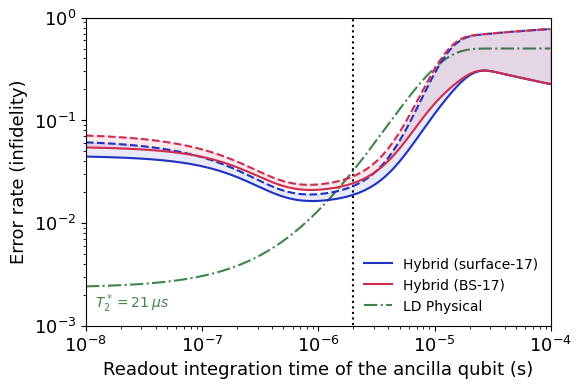

In [ ]:
ftsz = 13
lbsz = 10

x = dfsurfST['t']

y3 = dfsurfST['p_lowerST']
# y3 = update_benddown_curve(y3)
# y4 = update_up_bound_curve(y4)

y5 = dfsurfST['p_LDqubit_STduration_upper']
y6 = dfsurfST['p_210_STduration_upper']
y7 = dfsurfST['p_2100_STduration_upper']

y8 = dfBSST['p_lowerST']
y9 = dfBSST['p_upperST']
# y8 = update_benddown_curve(y8)
# y9 = update_up_bound_curve(y9)

color3 = '#3F8449'
color2 = '#CE2D4F'
color1 = '#1F32C1'

#int_t_ST = 0.4*1.e-6
int_t_ST = 2.0*1.e-6  # the total measurement time is 2.4 us, of which 0.4 us is the ramping time.

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)

plt.axvline(x = int_t_ST , color = 'k', ymin=0.001, ymax= 1.2 , linestyle = ':' )
# plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = '-.' )

#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

#ax.plot(x*1, y1, color=color2, label="All-Zeeman") #
#ax.plot(x*1, y2, color=color2,  linestyle = '--' , label="")
#ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)

ax.plot(x, y3, color=color1, label="Hybrid (surface-17)")
ax.fill_between(x*1, y3, y4, color = color1 ,  alpha = 0.1)
ax.plot(x, y4, color=color1, linestyle = '--', label="")

ax.plot(x, y8, color=color2, label="Hybrid (BS-17)")
ax.fill_between(x*1, y8, y9, color = color2 ,  alpha = 0.1)
ax.plot(x, y9, color=color2, linestyle = '--', label="")

plt_fac = 0.6
ax.plot(x*1, y5, '-.', color=color3, label="LD Physical",zorder=-1) #, label="T2 = 21 us"
ax.text(1.2e-8, 1.5e-3, r'$T_2^*=21 \; \mu s$', color=color3, fontsize=lbsz)

#ax.plot(x, y6, '-.', color=color3,zorder=-1) #, label="T2 = 210 us"
#ax.text(1.2e-8, y6[0]*plt_fac, r'$T_{2, echo}=210 \; \mu s$',color=color3, fontsize=lbsz)
# ax.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax.tick_params(axis='both',  labelsize=ftsz)

#ax2.tick_params(colors=color2, which='major', labelsize=lbsz)
#ax2.tick_params(colors='black', which='minor', labelsize=lbsz)
#ax2.spines['top'].set_color(color2)
#ax2.spines['bottom'].set_color(color1)
# ax.spines['bottom'].set_lw(3)


# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-8, 1e-4)
plt.ylim(1e-3, 1)
plt.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

# plt.grid(alpha = 0.25)
# plt.show()
plt.savefig(folder+"/S17-BS17_comp-alternative.pdf", format="pdf", bbox_inches="tight")


In [ ]:
#data_filename_pCZ = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30pCZ.dat'
data_filename_pCZ = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10p2q_Tplus.dat' # for the new experimental parameters the measurement time ratio is 10.
dfsurfX30_pCZ = pd.read_csv(data_filename_pCZ, sep = ' ')

In [ ]:
dfsurfX30_pCZ

,t,p_lowerST2,p_upperST2,p_lowerST3,p_upperST3,p_lowerST4,p_upperST4,p_lowerST0,p_upperST0
0,1.000000e-08,0.044318,0.060992,0.033089,0.041974,0.100886,0.394739,0.031860,0.040047
1,1.009253e-08,0.044309,0.060968,0.033081,0.041957,0.100892,0.394667,0.031853,0.040031
2,1.018591e-08,0.044300,0.060944,0.033073,0.041940,0.100899,0.394593,0.031845,0.040015
3,1.028016e-08,0.044291,0.060919,0.033065,0.041923,0.100905,0.394520,0.031837,0.039998
4,1.037528e-08,0.044282,0.060894,0.033057,0.041906,0.100912,0.394445,0.031829,0.039982
...,...,...,...,...,...,...,...,...,...
995,9.549926e-05,0.227076,0.772366,0.248416,0.750221,0.071103,0.929844,0.250796,0.747736
996,9.638290e-05,0.226670,0.772773,0.247972,0.750667,0.070976,0.929969,0.250348,0.748186
997,9.727472e-05,0.226275,0.773168,0.247539,0.751101,0.070852,0.930091,0.249911,0.748624
998,9.817479e-05,0.225891,0.773553,0.247119,0.751523,0.070732,0.930209,0.249487,0.749051


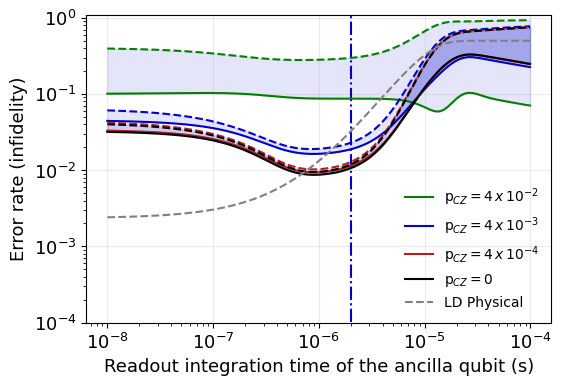

In [ ]:
ftsz = 13
lbsz = 10

x7 = dfsurfX30_pCZ['t']

y71 = dfsurfX30_pCZ['p_lowerST2']
# y71 = update_benddown_curve(y71)
y72 = dfsurfX30_pCZ['p_upperST2']
# y72 = update_up_bound_curve(y72)

y73 = dfsurfX30_pCZ['p_lowerST3']
# y73 = update_benddown_curve(y73)
y74 = dfsurfX30_pCZ['p_upperST3']
# y74 = update_up_bound_curve(y74)

y75 = dfsurfX30_pCZ['p_lowerST4']
# y75 = update_benddown_curve(y75)
y76 = dfsurfX30_pCZ['p_upperST4']
# y76 = update_up_bound_curve(y76)

y77 = dfsurfX30_pCZ['p_lowerST0']
# y77 = update_benddown_curve(y77)
y78 = dfsurfX30_pCZ['p_upperST0']
# y78 = update_up_bound_curve(y78)

# y79 = dfsurfX30_pCZ['p_lowerST1']
# y79 = update_benddown_curve(y79)
# y710 = dfsurfX30_pCZ['p_upperST1']
# y710 = update_up_bound_curve(y710)

y711 = dfsurfST['p_LDqubit_STduration_upper']

color1 = 'mediumblue'
color2 = 'firebrick'

# Initialise the figure and axes.
fig, ax1 = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
ax1.set_xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
ax1.set_ylabel('Error rate (infidelity)', fontsize=ftsz)

#plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = '-.' )

ax1.axvline(x = 2.0e-6, color = color1, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

#ax1.plot(x7*1, y79, color=color2, label="p$_{CZ} = 10^{-2}$") #
#ax1.plot(x7*1, y710, color=color2,  linestyle = '--' , label="")
#ax1.fill_between(x, y79, y710, color = color1, alpha = 0.1)

ax1.plot(x*1, y75, color='green', label="p$_{CZ} = 4 \, x \, 10^{-2}$") #
ax1.plot(x*1, y76, color='green',  linestyle = '--' , label="")
ax1.fill_between(x, y75, y76, color = color1, alpha = 0.1)

ax1.plot(x7*1, y71, color=color1, label="p$_{CZ} = 4 \, x \, 10^{-3}$") #
ax1.plot(x7*1, y72, color=color1,  linestyle = '--' , label="")
ax1.fill_between(x, y71, y72, color = color1, alpha = 0.1)

ax1.plot(x7*1, y73, color=color2, label="p$_{CZ} = 4 \, x \, 10^{-4}$") #
ax1.plot(x7*1, y74, color=color2,  linestyle = '--' , label="")
ax1.fill_between(x7, y73, y74, color = color1, alpha = 0.1)

ax1.plot(x7*1, y77, color='black', label="p$_{CZ} = 0$") #
ax1.plot(x7*1, y78, color='black',  linestyle = '--' , label="")
ax1.fill_between(x7, y77, y78, color = color1, alpha = 0.1)


plt_fac = 1.1
#ax1.plot(x7*1, y711, '--', color="gray", label="Physical qubit ($T_2^*=21 \; \mu s$)") #, label="T2 = 21 us"
ax1.plot(x7*1, y711, '--', color="gray", label="LD Physical")
#ax.text(0.8e-8, y11[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)




#ax.plot(x*1, y3, color=color1, label="p$_{meas} = 1.5 X 10^{-3}$") #
#ax.plot(x*1, y4, color=color1,  linestyle = '--' , label="")
#ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)


#ax.plot(x, y3, color=color1, label="LD-ST")
#ax.fill_between(x*1, y1, y2, color = color2 ,  alpha = 0.1)
#ax.plot(x, y4, color=color1, linestyle = '--', label="")

#plt_fac = 1.1
#ax.plot(x*1, y5, '--', color="lightgray") #, label="T2 = 21 us"
#ax.text(1e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)

#ax.plot(x, y6, '--', color="gray") #, label="T2 = 210 us"
#ax.text(1e-8, y6[0]*plt_fac, r'$T_{2, CPMG}=210 \; \mu s$', fontsize=lbsz)
# ax.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax1.tick_params(axis='both',  labelsize=ftsz)

# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(0.0001, 1.1)
ax1.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

ax1.grid(alpha = 0.25)
#plt.savefig("./MC_results/NewFigures/Fig4.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [ ]:
# data_filename_tCZ = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30tCZ.dat'
data_filename_tCZ = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10tCZ_Tplus.dat' # for the new experimental parameters the measurement time ratio is 10.
dfsurfX30_tCZ = pd.read_csv(data_filename_tCZ, sep = ' ')

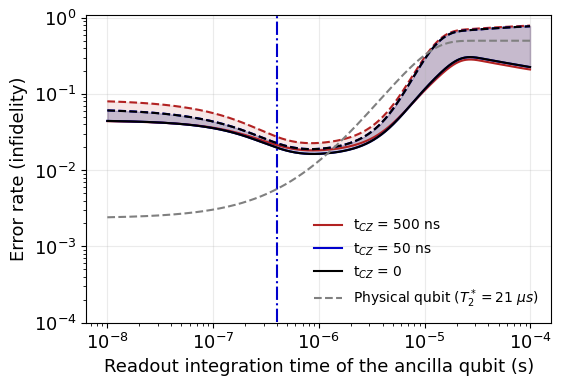

In [ ]:
ftsz = 13
lbsz = 10

x8 = dfsurfX30_tCZ['t']

y81 = dfsurfX30_tCZ['p_lowerST2']
# y81 = update_benddown_curve(y81)
y82 = dfsurfX30_tCZ['p_upperST2']
# y82 = update_up_bound_curve(y82)

y83 = dfsurfX30_tCZ['p_lowerST3']
# y83 = update_benddown_curve(y83)
y84 = dfsurfX30_tCZ['p_upperST3']
# y84 = update_up_bound_curve(y84)

y85 = dfsurfX30_tCZ['p_lowerST4']
# y85 = update_benddown_curve(y85)
y86 = dfsurfX30_tCZ['p_upperST4']
# y86 = update_up_bound_curve(y86)

y87 = dfsurfX30_tCZ['p_lowerST0']
# y87 = update_benddown_curve(y87)
y88 = dfsurfX30_tCZ['p_upperST0']
# y88 = update_up_bound_curve(y88)

y811 = dfsurfST['p_LDqubit_STduration_upper']


color1 = 'mediumblue'
color2 = 'firebrick'

# Initialise the figure and axes.
fig, ax2 = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
ax2.set_xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
ax2.set_ylabel('Error rate (infidelity)', fontsize=ftsz)

#plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = '-.' )

ax2.axvline(x = 0.4e-6, color = color1, ymin= 0.001, ymax=1.1, linestyle = '-.')
#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

ax2.plot(x8*1, y83, color=color2, label="t$_{CZ}$ = 500 ns") #
ax2.plot(x8*1, y84, color=color2,  linestyle = '--' , label="")
ax2.fill_between(x8, y83, y84, color = color2, alpha = 0.1)

ax2.plot(x8*1, y81, color=color1, label="t$_{CZ}$ = 50 ns") #
ax2.plot(x8*1, y82, color=color1,  linestyle = '--' , label="")
ax2.fill_between(x8, y81, y82, color = color1, alpha = 0.1)

#ax2.plot(x*1, y5, color='green', label="t$_{CZ}$ = 5 $\mu$ s") #
#ax2.plot(x*1, y6, color='green',  linestyle = '--' , label="")
#ax2.fill_between(x, y5, y6, color = color1, alpha = 0.1)

ax2.plot(x8*1, y87, color='black', label="t$_{CZ}$ = 0") #
ax2.plot(x8*1, y88, color='black',  linestyle = '--' , label="")
ax2.fill_between(x8, y87, y88, color = 'k', alpha = 0.1)

#ax2.plot(x*1, y3, color=color1, label="p$_{meas} = 1.5 X 10^{-3}$") #
#ax2.plot(x*1, y4, color=color1,  linestyle = '--' , label="")
#ax2.fill_between(x, y3, y4, color = color1, alpha = 0.1)


#ax2.plot(x, y3, color=color1, label="LD-ST")
#ax2.fill_between(x*1, y1, y2, color = color2 ,  alpha = 0.1)
#ax2.plot(x, y4, color=color1, linestyle = '--', label="")

plt_fac = 1.1
ax2.plot(x8*1, y811, '--', color="gray", label="Physical qubit ($T_2^*=21 \; \mu s$)") #, label="T2 = 21 us"
#ax.text(0.8e-8, y11[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)


#plt_fac = 1.1
#ax2.plot(x*1, y5, '--', color="lightgray") #, label="T2 = 21 us"
#ax2.text(1e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)

#ax2.plot(x, y6, '--', color="gray") #, label="T2 = 210 us"
#ax2.text(1e-8, y6[0]*plt_fac, r'$T_{2, CPMG}=210 \; \mu s$', fontsize=lbsz)
# ax2.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax2.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax2.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax2.tick_params(axis='both',  labelsize=ftsz)

# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(0.0001, 1.1)
ax2.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

ax2.grid(alpha = 0.25)
#plt.savefig("./MC_results/NewFigures/Fig5.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [ ]:
# data_filename_pprep = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30pprep.dat'
data_filename_pprep = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10pprep_Tplus.dat' # for the new experimental parameters the measurement time ratio is 10.
dfsurfX30_pprep = pd.read_csv(data_filename_pprep, sep = ' ')

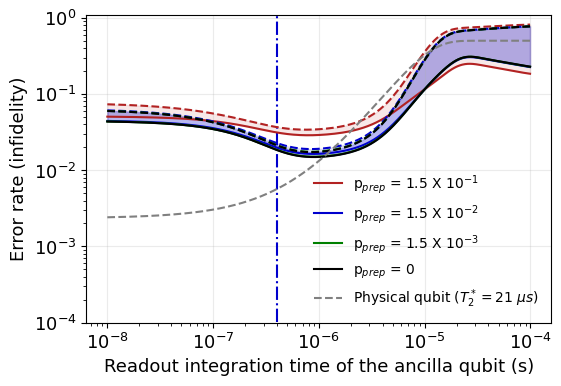

In [ ]:
ftsz = 13
lbsz = 10

x9 = dfsurfX30_pprep['t']

y91 = dfsurfX30_pprep['p_lowerST2']
# y91 = update_benddown_curve(y91)
y92 = dfsurfX30_pprep['p_upperST2']
# y92 = update_up_bound_curve(y92)

y93 = dfsurfX30_pprep['p_lowerST3']
# y93 = update_benddown_curve(y93)
y94 = dfsurfX30_pprep['p_upperST3']
# y94 = update_up_bound_curve(y94)

y95 = dfsurfX30_pprep['p_lowerST4']
# y95 = update_benddown_curve(y95)
y96 = dfsurfX30_pprep['p_upperST4']
# y96 = update_up_bound_curve(y96)

y97 = dfsurfX30_pprep['p_lowerST0']
# y97 = update_benddown_curve(y97)
y98 = dfsurfX30_pprep['p_upperST0']
# y98 = update_up_bound_curve(y98)

y911 = dfsurfST['p_LDqubit_STduration_upper']


color1 = 'mediumblue'
color2 = 'firebrick'

# Initialise the figure and axes.
fig, ax3 = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
ax3.set_xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
ax3.set_ylabel('Error rate (infidelity)', fontsize=ftsz)

#plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = '-.' )

ax3.axvline(x = 0.4e-6, color = color1, ymin= 0.001, ymax=1.1, linestyle = '-.')
#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',


ax3.plot(x9*1, y95, color=color2, label="p$_{prep}$ = 1.5 X 10$^{-1}$") #
ax3.plot(x9*1, y96, color=color2,  linestyle = '--' , label="")
ax3.fill_between(x9, y95, y96, color = color2, alpha = 0.1)

ax3.plot(x9*1, y91, color=color1, label="p$_{prep}$ = 1.5 X 10$^{-2}$") #
ax3.plot(x9*1, y92, color=color1,  linestyle = '--' , label="")
ax3.fill_between(x9, y91, y92, color = color1, alpha = 0.1)

ax3.plot(x9*1, y93, color='green', label="p$_{prep}$ = 1.5 X 10$^{-3}$") #
ax3.plot(x9*1, y94, color='green',  linestyle = '--' , label="")
ax3.fill_between(x9, y93, y94, color = color1, alpha = 0.1)

ax3.plot(x9*1, y97, color='black', label="p$_{prep}$ = 0") #
ax3.plot(x9*1, y98, color='black',  linestyle = '--' , label="")
ax3.fill_between(x9, y97, y98, color = color1, alpha = 0.1)

#ax3.plot(x*1, y3, color=color1, label="p$_{meas} = 1.5 X 10^{-3}$") #
#ax3.plot(x*1, y4, color=color1,  linestyle = '--' , label="")
#ax3.fill_between(x, y3, y4, color = color1, alpha = 0.1)

plt_fac = 1.1
ax3.plot(x9*1, y911, '--', color="gray", label="Physical qubit ($T_2^*=21 \; \mu s$)") #, label="T2 = 21 us"
#ax3.text(0.8e-8, y11[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)


#ax3.plot(x, y3, color=color1, label="LD-ST")
#ax3.fill_between(x*1, y1, y2, color = color2 ,  alpha = 0.1)
#ax3.plot(x, y4, color=color1, linestyle = '--', label="")

#plt_fac = 1.1
#ax3.plot(x*1, y5, '--', color="lightgray") #, label="T2 = 21 us"
#ax3.text(1e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)

#ax3.plot(x, y6, '--', color="gray") #, label="T2 = 210 us"
#ax3.text(1e-8, y6[0]*plt_fac, r'$T_{2, CPMG}=210 \; \mu s$', fontsize=lbsz)
# ax3.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax3.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax3.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax3.tick_params(axis='both',  labelsize=ftsz)

# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(0.0001, 1.1)
ax3.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

ax3.grid(alpha = 0.25)
#plt.savefig("./MC_results/NewFigures/Fig6.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [ ]:
# data_filename_p1q = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30p1q.dat'
data_filename_p1q = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10p1q_Tplus.dat' # for the new experimental parameters the measurement time ratio is 10.
dfsurfX30_p1q = pd.read_csv(data_filename_p1q, sep = ' ')

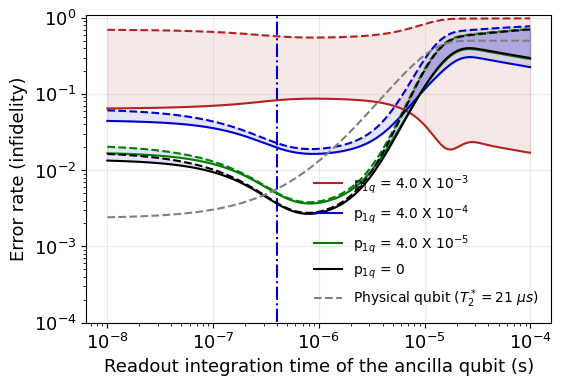

In [ ]:
ftsz = 13
lbsz = 10

x10 = dfsurfX30_p1q['t']

y101 = dfsurfX30_p1q['p_lowerST2']
# y101 = update_benddown_curve(y101)
y102 = dfsurfX30_p1q['p_upperST2']
# y102 = update_up_bound_curve(y102)

y103 = dfsurfX30_p1q['p_lowerST3']
# y103 = update_benddown_curve(y103)
y104 = dfsurfX30_p1q['p_upperST3']
# y104 = update_up_bound_curve(y104)

y105 = dfsurfX30_p1q['p_lowerST4']
# y105 = update_benddown_curve(y105)
y106 = dfsurfX30_p1q['p_upperST4']
# y106 = update_up_bound_curve(y106)

y107 = dfsurfX30_p1q['p_lowerST0']
# y107 = update_benddown_curve(y107)
y108 = dfsurfX30_p1q['p_upperST0']
# y108 = update_up_bound_curve(y108)

y1011 = dfsurfST['p_LDqubit_STduration_upper']


color1 = 'mediumblue'
color2 = 'firebrick'

# Initialise the figure and axes.
fig, ax4 = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
ax4.set_xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
ax4.set_ylabel('Error rate (infidelity)', fontsize=ftsz)

#plt.axhline(y=2.0*1.e-3 , color = color1, linestyle = '-.' )

ax4.axvline(x = 0.4e-6, color = color1, ymin= 0.001, ymax=1.1, linestyle = '-.')
#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

ax4.plot(x10*1, y105, color=color2, label="p$_{1q}$ = 4.0 X 10$^{-3}$") #
ax4.plot(x10*1, y106, color=color2,  linestyle = '--' , label="")
ax4.fill_between(x10, y105, y106, color = color2, alpha = 0.1)

ax4.plot(x10*1, y101, color=color1, label="p$_{1q}$ = 4.0 X 10$^{-4}$") #
ax4.plot(x10*1, y102, color=color1,  linestyle = '--' , label="")
ax4.fill_between(x10, y101, y102, color = color1, alpha = 0.1)

ax4.plot(x10*1, y103, color='green', label="p$_{1q}$ = 4.0 X 10$^{-5}$") #
ax4.plot(x10*1, y104, color='green',  linestyle = '--' , label="")
ax4.fill_between(x10, y103, y104, color = color1, alpha = 0.1)


ax4.plot(x10*1, y107, color='black', label="p$_{1q}$ = 0") #
ax4.plot(x10*1, y108, color='black',  linestyle = '--' , label="")
ax4.fill_between(x10, y107, y108, color = color1, alpha = 0.1)

#ax4.plot(x*1, y3, color=color1, label="p$_{meas} = 1.5 X 10^{-3}$") #
#ax4.plot(x*1, y4, color=color1,  linestyle = '--' , label="")
#ax4.fill_between(x, y3, y4, color = color1, alpha = 0.1)

plt_fac = 1.1
ax4.plot(x10*1, y1011, '--', color="gray", label="Physical qubit ($T_2^*=21 \; \mu s$)") #, label="T2 = 21 us"
#ax4.text(0.8e-8, y11[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)

#ax4.plot(x, y3, color=color1, label="LD-ST")
#ax4.fill_between(x*1, y1, y2, color = color2 ,  alpha = 0.1)
#ax4.plot(x, y4, color=color1, linestyle = '--', label="")

#plt_fac = 1.1
#ax4.plot(x*1, y5, '--', color="lightgray") #, label="T2 = 21 us"
#ax4.text(1e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)

#ax4.plot(x, y6, '--', color="gray") #, label="T2 = 210 us"
#ax4.text(1e-8, y6[0]*plt_fac, r'$T_{2, CPMG}=210 \; \mu s$', fontsize=lbsz)
# ax4.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax4.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax4.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax4.tick_params(axis='both',  labelsize=ftsz)

# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim(0.0001, 1.1)
ax4.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

ax4.grid(alpha = 0.25)
#plt.savefig("./MC_results/NewFigures/Fig7.pdf", format="pdf", bbox_inches="tight")
# plt.show()

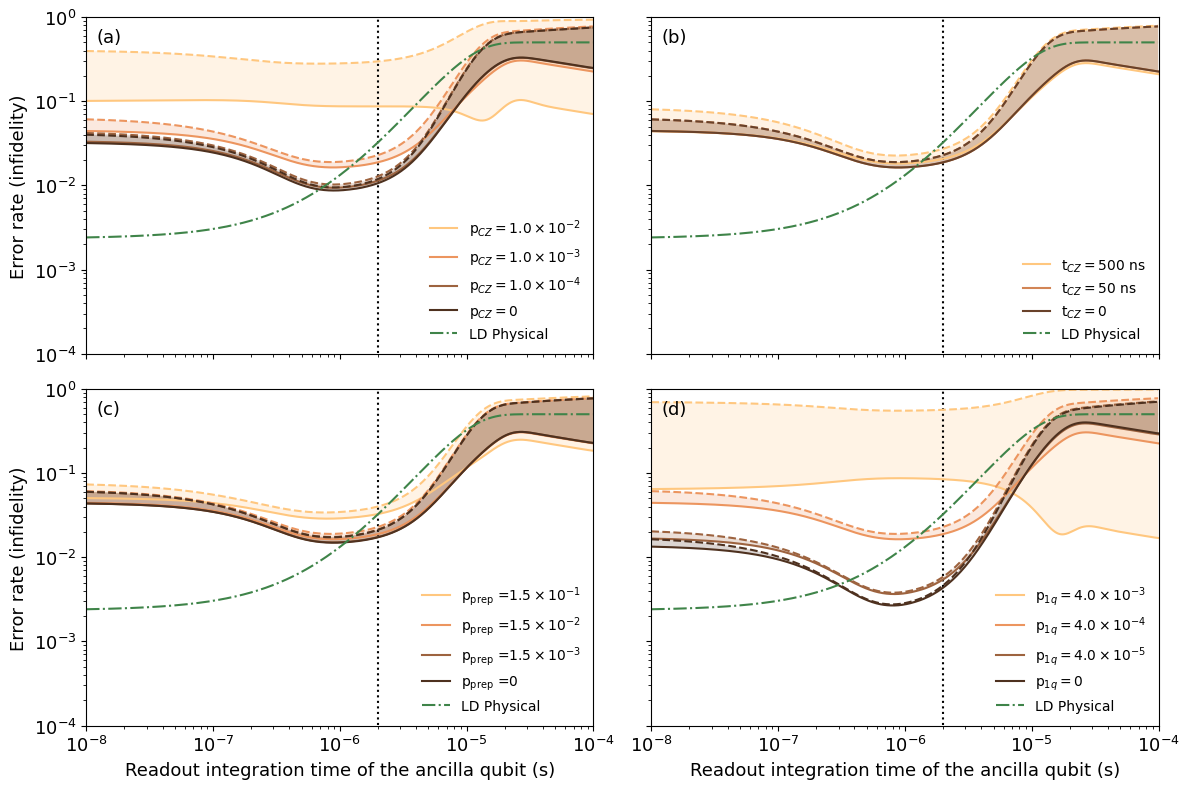

In [ ]:
lbsz = 10
ftsz = 13

plot_dict = {'ax1':{'x':x7,'y1a':y75,'y1b':y76,'y2a':y71,'y2b':y72,'y3a':y73,'y3b':y74,'y4a':y77,'y4b':y78,'y5':y711},\
 'ax2':{'x':x8,'y1a':y83,'y1b':y84,'y2a':y81,'y2b':y82,'y3a':y87,'y3b':y88,'y5':y811},
 'ax3':{'x':x9,'y1a':y95,'y1b':y96,'y2a':y91,'y2b':y92,'y3a':y93,'y3b':y94,'y4a':y97,'y4b':y98,'y5':y911},
 'ax4':{'x':x10,'y1a':y105,'y1b':y106,'y2a':y101,'y2b':y102,'y3a':y103,'y3b':y104,'y4a':y107,'y4b':y108,'y5':y1011}}
# plot_dict = {'ax1':{'x':x7,'y1a':y71,'y1b':y72,'y2a':y73,'y2b':y74,'y3a':y77,'y3b':y78,'y4':y711},\
#  'ax2':{'x':x8,'y1a':y83,'y1b':y84,'y2a':y81,'y2b':y82,'y3a':y87,'y3b':y88,'y5':y811},
#  'ax3':{'x':x9,'y1a':y95,'y1b':y96,'y2a':y91,'y2b':y92,'y3a':y93,'y3b':y94,'y4a':y97,'y4b':y98,'y5':y911},
#  'ax4':{'x':x10,'y1a':y105,'y1b':y106,'y2a':y101,'y2b':y102,'y3a':y103,'y3b':y104,'y4a':y107,'y4b':y108,'y5':y1011}}

label_dict={'ax1':{'x':"p$_{CZ} =$",'y1':r'$1.0\times{10}^{-2}$','y2':r'$1.0\times{10}^{-3}$','y3':r'$1.0\times{10}^{-4}$','y4':'${0}$'},\
            'ax2':{'x':"t$_{CZ} =$",'y1':'500 ns','y2':'50 ns','y3':'0'},\
            'ax3':{'x':"p$_{\mathrm{prep}}$ =",'y1':r'$1.5 \times {10}^{-1}$','y2':r'$1.5 \times {10}^{-2}$','y3':r'$1.5 \times {10}^{-3}$','y4':r'${0}$'},\
            'ax4':{'x':"p$_{1q} =$",'y1':r'$4.0\times{10}^{-3}$','y2':r'$4.0\times{10}^{-4}$','y3':r'$4.0\times{10}^{-5}$','y4':'${0}$'}}

# color_arr = ['mediumblue','firebrick','green','black','gray']

# Initialise the figure and axes.
fig, ax = plt.subplots(2,2, figsize=(12,8),sharex=True,sharey=True)

dummy=0

color3 = '#3F8449'
for i in range(2):
  for j in range(2):
    dummy+=1
    ax1=ax[i][j];

    ax1.axvline(x = 2.0e-6, color = 'k', ymin= 0.001, ymax=1.1, linestyle = ':') #, label = 'axvline - full height'
    color_arr = mpl.colormaps['copper_r'](np.linspace(0,1,len(plot_dict[f'ax{dummy}'])//2))

    for k,key in enumerate(plot_dict[f'ax{dummy}']):

      if k>0 and k<(len(plot_dict[f'ax{dummy}'])//2):
        # print(k)
        ax1.plot(plot_dict[f'ax{dummy}']['x'],plot_dict[f'ax{dummy}'][f'y{k}a'],label=label_dict[f'ax{dummy}']['x']+label_dict[f'ax{dummy}'][f'y{k}']\
                 ,color=color_arr[k-1],linestyle='-')
        ax1.plot(plot_dict[f'ax{dummy}']['x'],plot_dict[f'ax{dummy}'][f'y{k}b']\
                 ,color=color_arr[k-1],linestyle='--')
        ax1.fill_between(plot_dict[f'ax{dummy}']['x'],plot_dict[f'ax{dummy}'][f'y{k}a'],plot_dict[f'ax{dummy}'][f'y{k}b'],color=color_arr[k-1],ec=None,alpha=0.2)
    ax1.plot(plot_dict[f'ax{dummy}']['x'],plot_dict[f'ax{dummy}'][f'y5'],label="LD Physical"\
                 ,color=color3,linestyle='-.')
    ax1.text(1.2e-8,5e-1,'({})'.format(['a','b','c','d'][dummy-1]),fontsize=ftsz)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_xlim(1e-8, 1e-4)
    ax1.set_ylim(1e-4, 1e0)
    ax1.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)
    ax1.tick_params(axis='both',  labelsize=ftsz)
    # ax1.grid(alpha = 0.25)
ax[1][0].set_xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
ax[1][1].set_xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
ax[0][0].set_ylabel('Error rate (infidelity)', fontsize=ftsz)
ax[1][0].set_ylabel('Error rate (infidelity)', fontsize=ftsz);

plt.tight_layout()

plt.savefig(folder+"/collection.pdf", format="pdf", bbox_inches="tight")

In [ ]:
data_filename_p1q2q = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10p1q2q_Tplus.dat'
dfsurf10_p1q2q = pd.read_csv(data_filename_p1q2q, sep = ' ')

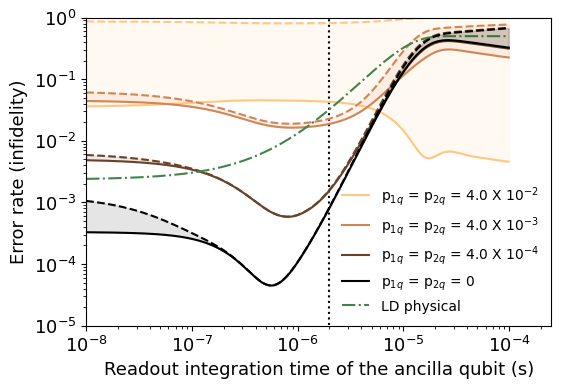

In [ ]:
ftsz = 13
lbsz = 10

x = dfsurf10_p1q2q['t']

y1 = dfsurf10_p1q2q['p_lowerST2']
# y1 = update_benddown_curve(y1)
y2 = dfsurf10_p1q2q['p_upperST2']
# y2 = update_up_bound_curve(y2)

y3 = dfsurf10_p1q2q['p_lowerST3']
#y3 = update_benddown_curve(y3)
y4 = dfsurf10_p1q2q['p_upperST3']
#y4 = update_up_bound_curve(y4)

y5 = dfsurf10_p1q2q['p_lowerST4']
#y5 = update_benddown_curve(y5)
y6 = dfsurf10_p1q2q['p_upperST4']
#y6 = update_up_bound_curve(y6)

y7 = dfsurf10_p1q2q['p_lowerST0']
#y7 = update_benddown_curve(y7)
y8 = dfsurf10_p1q2q['p_upperST0']
#y8 = update_up_bound_curve(y8)

y1011 = dfsurfST['p_LDqubit_STduration_upper']

color_arr = mpl.colormaps['copper_r'](np.linspace(0,1,4))
color1 = color_arr[0]
color2 = color_arr[1]
color3 = color_arr[2]
color4 = color_arr[3]

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

int_t_ST = 2.0e-6

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)


#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )
plt.axvline(x = int_t_ST , color = 'k', ymin=0.001, ymax= 1.2 , linestyle = ':' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',



ax.plot(x*1, y5, color=color1, label="p$_{1q}$ = p$_{2q}$ = 4.0 X 10$^{-2}$") #
ax.plot(x*1, y6, color=color1,  linestyle = '--' , label="")
ax.fill_between(x, y5, y6, color = color1, alpha = 0.1)

ax.plot(x*1, y1, color=color2, label="p$_{1q}$ = p$_{2q}$ = 4.0 X 10$^{-3}$") #
ax.plot(x*1, y2, color=color2,  linestyle = '--' , label="")
ax.fill_between(x, y1, y2, color = color2, alpha = 0.1)

ax.plot(x*1, y3, color=color3, label="p$_{1q}$ = p$_{2q}$ = 4.0 X 10$^{-4}$") #
ax.plot(x*1, y4, color=color3,  linestyle = '--' , label="")
ax.fill_between(x, y3, y4, color = color3, alpha = 0.1)

ax.plot(x*1, y7, color=color4, label="p$_{1q}$ = p$_{2q}$ = 0",zorder=100) #
ax.plot(x*1, y8, color=color4,  linestyle = '--' , label="",zorder=100)
ax.fill_between(x, y7, y8, color = color4, alpha = 0.1,zorder=100)


color_phys = '#3F8449'
#ax.plot(x*1, y9, color=color2, linestyle = '--', label="") #
ax.plot(x*1, y1011, color=color_phys, linestyle = '-.' , label="LD physical")
#ax.fill_between(x, y9, y10, color = color2, alpha = 0.1)

ax.tick_params(axis='both',  labelsize=ftsz)


plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-8, 2.5e-4)
plt.ylim(1e-5, 1)
plt.legend(loc="lower right", title="", frameon=False, fontsize=lbsz)


# plt.grid(alpha = 0.25)
plt.savefig(folder+"/p1q2q.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [6]:
# data_filename_T2 = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas30T2.dat'
data_filename_T2 = folder + 'QECd3_surface17/qdot1/2/X/resultsQECd3_Imeas10T2_Tplus.dat' # for the new experimental parameters the measurement time ratio is 10.
dfsurfX30_T2 = pd.read_csv(data_filename_T2, sep = ' ')

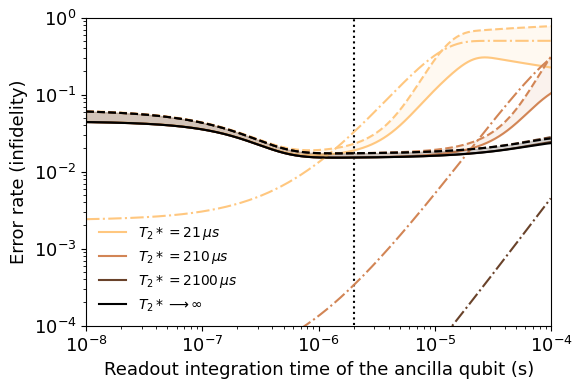

In [7]:
ftsz = 13
lbsz = 10

x = dfsurfX30_T2['t']

y1 = dfsurfX30_T2['p_lowerST2']
# y1 = update_benddown_curve(y1)
y2 = dfsurfX30_T2['p_upperST2']
# y2 = update_up_bound_curve(y2)

y3 = dfsurfX30_T2['p_lowerST3']
#y3 = update_benddown_curve(y3)
y4 = dfsurfX30_T2['p_upperST3']
#y4 = update_up_bound_curve(y4)

y5 = dfsurfX30_T2['p_lowerST4']
#y5 = update_benddown_curve(y5)
y6 = dfsurfX30_T2['p_upperST4']
#y6 = update_up_bound_curve(y6)

y7 = dfsurfX30_T2['p_lowerST0']
#y7 = update_benddown_curve(y7)
y8 = dfsurfX30_T2['p_upperST0']
#y8 = update_up_bound_curve(y8)

y9 = dfsurfX30_T2['p_physST2_lower']
# y9 = update_benddown_curve(y9)
y10 = dfsurfX30_T2['p_physST2_upper']
#y10 = update_up_bound_curve(y10)

y11 = dfsurfX30_T2['p_physST3_lower']
# y11 = update_benddown_curve(y11)
y12 = dfsurfX30_T2['p_physST3_upper']
#y12 = update_up_bound_curve(y12)

y13 = dfsurfX30_T2['p_physST4_lower']
# y13 = update_benddown_curve(y13)
y14 = dfsurfX30_T2['p_physST4_upper']
#y14 = update_up_bound_curve(y12)


color_arr = mpl.colormaps['copper_r'](np.linspace(0,1,4))
color1 = color_arr[0]
color2 = color_arr[1]
color3 = color_arr[2]
color4 = color_arr[3]

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

int_t_ST = 2.0e-6

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)


#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )
plt.axvline(x = int_t_ST , color = 'k', ymin=0.001, ymax= 1.2 , linestyle = ':' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

ax.plot(x*1, y1, color=color1, label="$T_2* = 21 \, \mu s$") #
ax.plot(x*1, y2, color=color1,  linestyle = '--' , label="")
ax.fill_between(x, y1, y2, color = color1, alpha = 0.1)

ax.plot(x*1, y3, color=color2, label="$T_2* = 210 \, \mu s$") #
ax.plot(x*1, y4, color=color2,  linestyle = '--' , label="")
ax.fill_between(x, y3, y4, color = color2, alpha = 0.1)

ax.plot(x*1, y5, color=color3, label="$T_2* = 2100 \, \mu s$") #
ax.plot(x*1, y6, color=color3,  linestyle = '--' , label="")
ax.fill_between(x, y5, y6, color = color3, alpha = 0.1)

ax.plot(x*1, y7, color=color4, label="$T_2* \longrightarrow \infty$",zorder=100) #
ax.plot(x*1, y8, color=color4,  linestyle = '--' , label="",zorder=100)
ax.fill_between(x, y7, y8, color = color4, alpha = 0.1,zorder=100)

#ax.plot(x*1, y9, color=color2, linestyle = '--', label="") #
ax.plot(x*1, y10, color=color1,  linestyle = 'dashdot' , label="")
#ax.fill_between(x, y9, y10, color = color2, alpha = 0.1)

#ax.plot(x*1, y11, color=color1, linestyle = '--', label="") #
ax.plot(x*1, y12, color=color2,  linestyle = 'dashdot' , label="")
#ax.fill_between(x, y11, y12, color = color1, alpha = 0.1)

#ax.plot(x*1, y13, color='green', linestyle = '--', label="") #
ax.plot(x*1, y14, color=color3,  linestyle = 'dashdot' , label="")
#ax.fill_between(x, y13, y14, color = color1, alpha = 0.1)


#ax.plot(x*1, y3, color=color1, label="p$_{meas} = 1.5 X 10^{-3}$") #
#ax.plot(x*1, y4, color=color1,  linestyle = '--' , label="")
#ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)


#ax.plot(x, y3, color=color1, label="LD-ST")
#ax.fill_between(x*1, y1, y2, color = color2 ,  alpha = 0.1)
#ax.plot(x, y4, color=color1, linestyle = '--', label="")

#plt_fac = 1.1
#ax.plot(x*1, y5, '--', color="lightgray") #, label="T2 = 21 us"
#ax.text(1e-8, y5[0]*plt_fac, r'$T_2^*=21 \; \mu s$', fontsize=lbsz)

#ax.plot(x, y6, '--', color="gray") #, label="T2 = 210 us"
#ax.text(1e-8, y6[0]*plt_fac, r'$T_{2, CPMG}=210 \; \mu s$', fontsize=lbsz)
# ax.plot(x, y7, color="darkgray", label="ST qubit idle during LD-ST QEC")
#ax.plot(x, y7, '--', color="black") #, label="T2 = 2100 us"
#ax.text(1e-8, y7[0]*plt_fac, r'$T_{2, CPMG}=2100 \; \mu s$', fontsize=lbsz)
ax.tick_params(axis='both',  labelsize=ftsz)

# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 10)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 10)
# print('TS breakeven readout duration (us)', x[idx_ts]* 1e6)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-8, 1e-4)
plt.ylim(1e-4, 1)
plt.legend(loc="lower left", title="", frameon=False, fontsize=lbsz)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

# plt.grid(alpha = 0.25)
plt.savefig(folder+"/T2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# data_filename_surf_prep = folder + 'QECd3_surface17/qdot1/prep/X/resultsQECd3_Imeas30prep_surface17.dat'
data_filename_surf_prep = folder + 'QECd3_surface17/qdot1/prep/X/resultsQECd3_Imeas10prep_surface17.dat' # for the new experimental parameters the measurement time ratio is 10.
dfsurf_prep = pd.read_csv(data_filename_surf_prep, sep = ' ')
# data_filename_BS_prep = folder + 'QECd3_BS17/qdot1/prep/X/resultsQECd3_Imeas30prep_BS17.dat'
data_filename_BS_prep = folder + 'QECd3_BS17/qdot1/prep/X/resultsQECd3_Imeas10prep_BS17.dat' # for the new experimental parameters the measurement time ratio is 10.
dfBS_prep = pd.read_csv(data_filename_BS_prep, sep = ' ')

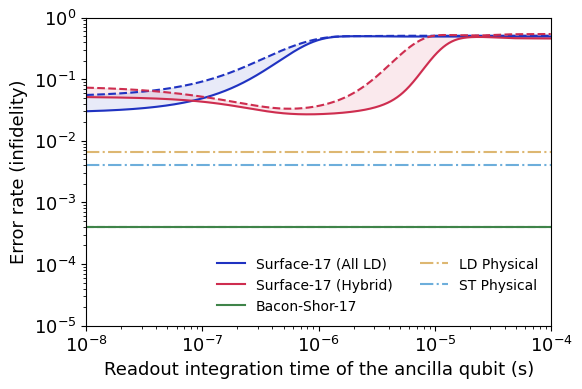

In [ ]:
ftsz = 13
lbsz = 10

x = dfsurf_prep['t']

y1 = dfsurf_prep['p_lowerST']
# y1 = update_benddown_curve(y1)
y2 = dfsurf_prep['p_upperST']
# y2 = update_up_bound_curve(y2)

y3 = dfsurf_prep['p_lowerLD']
# y3 = update_benddown_curve(y3)
y4 = dfsurf_prep['p_upperLD']
# y4 = update_up_bound_curve(y4)

y5 = dfBS_prep['p_lowerLD']
# y5 = update_benddown_curve(y5)
y6 = dfBS_prep['p_upperLD']
#y6 = update_up_bound_curve(y6)

y7 = dfBS_prep['p_prepLD']
y8 = dfBS_prep['p_prepST']

color5 = '#6DAEDB'
color4 = '#3F8449'
color3 = '#DDB771'
color2 = '#CE2D4F'
color1 = '#1F32C1'

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(6,4))

# Set the title for the figure
# fig.suptitle('Surface-17 FT QEC step (with |+> as initial state)', fontsize=15)
plt.xlabel('Readout integration time of the ancilla qubit (s)', fontsize=ftsz)
plt.ylabel('Error rate (infidelity)', fontsize=ftsz)


#plt.axvline(x = x_ld_sota, color = color2, ymin= 0.001, ymax=1.1, linestyle = '-.') #, label = 'axvline - full height'
#plt.axvline(x = x_st_sota , color = color1, ymin=0.001, ymax= 1.1 , linestyle = '-.' )

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
# ax.plot(x*30, y1_o, color=color2, linestyle = ':' , label="LD-LD (original)") #color="red", '--',

ax.plot(x*1, y3, color=color1, label="Surface-17 (All LD)") #
ax.plot(x*1, y4, color=color1,  linestyle = '--' , label="")
ax.fill_between(x, y3, y4, color = color1, alpha = 0.1)

ax.plot(x*1, y1, color=color2, label="Surface-17 (Hybrid)") #
ax.plot(x*1, y2, color=color2,  linestyle = '--' , label="")
ax.fill_between(x, y1, y2, color = color2, alpha = 0.1)

ax.plot(x*1, y5, color=color4, label="Bacon-Shor-17") #
ax.plot(x*1, y6, color=color4,  linestyle = '--' , label="")
ax.fill_between(x, y5, y6, color = color4, alpha = 0.1)

ax.plot(x*1, y7, color=color3, linestyle = '-.', label="LD Physical",zorder=-1) #
ax.plot(x*1, y8, color=color5,  linestyle = '-.' , label="ST Physical",zorder=-1)

ax.tick_params(axis='both',  labelsize=ftsz)


plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-8, 1e-4)
plt.ylim(1.e-5, 1)
plt.legend(loc='lower right',frameon=False, fontsize=lbsz,ncol=2)
# Add a legend, and position it on the lower left (with no box)
# idx_dl = np.argwhere(np.diff(np.sign(y2 - y5))).flatten()
# plt.plot(x[idx_dl]*30, y2[idx_dl], color = color2 , marker = '*', markersize = 16)
# print('DL breakeven readout duration (us)', x[idx_dl]*30 * 1e6)
# idx_ts = np.argwhere(np.diff(np.sign(y4 - y6))).flatten()
# plt.plot(x[idx_ts], y4[idx_ts], color = color1 , marker = '*', markersize = 16)
# plt.xlim(4e-6, 1.1e-5)
# plt.ylim(0.3, 0.6)
# plt.legend(loc="lower right", title="", frameon=False)
# Add a legend, and position it on the lower right (with no box)

# plt.grid(alpha = 0.25)
plt.savefig(folder+"/state_prep.pdf", format="pdf", bbox_inches="tight")
plt.show()

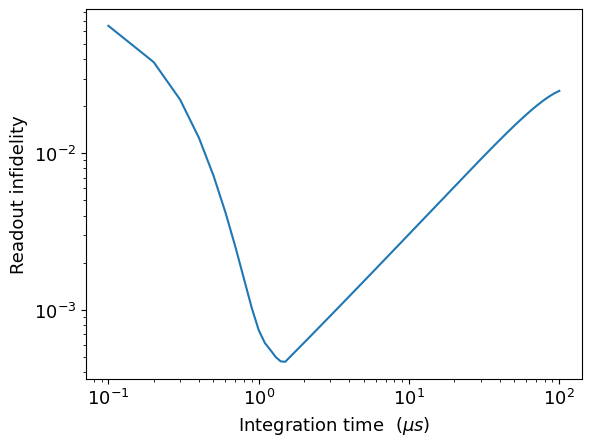

In [ ]:
ftsz = 13
lbsz = 10

# 1. Define the x values (domain)
integration_times = np.linspace(1.0e-1, 100, 1000)  # 100 points from 0 to 2π

# 2. Define the function f(x)
def err_func_readout_Tplus(int_t):

  '''
  Function to obtain the ST qubit readout infidelity from the integration time.
  The integration time (int_t) is taken to be in microseconds.
  '''

  if int_t <= 1.43:
    readout_err = (0.108253 - 0.536722*int_t + 1.18519*int_t**2 - 1.45935*int_t**3 +
             1.03857*int_t**4 - 0.3994*int_t**5 + 0.0642018*int_t**6)
  else:
    readout_err = (1.6711e-5 + (2.98899e-4)*int_t + (4.7596e-7)*int_t**2 -
             (9.6605e-9)*int_t**3)

  return readout_err

y = np.array([err_func_readout_Tplus(int_t) for int_t in integration_times])

# 3. Create the plot
plt.plot(integration_times, y)

# 4. Customize (optional)
plt.xlabel("Integration time  ($\mu s$)", fontsize=ftsz)
plt.ylabel("Readout infidelity", fontsize=ftsz)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='both',  labelsize=ftsz)

# 5. Show the plot
plt.savefig(folder+"/ST_readout_infidelity.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
list(np.linspace(0,2,10))

[np.float64(0.0),
 np.float64(0.2222222222222222),
 np.float64(0.4444444444444444),
 np.float64(0.6666666666666666),
 np.float64(0.8888888888888888),
 np.float64(1.1111111111111112),
 np.float64(1.3333333333333333),
 np.float64(1.5555555555555554),
 np.float64(1.7777777777777777),
 np.float64(2.0)]